In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving BostonMarathon2013.csv to BostonMarathon2013.csv


In [0]:
#write a story using k means, mean shift, spectral, and affinity
import io
df = pd.read_csv(io.BytesIO(uploaded['BostonMarathon2013.csv']))
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,CAN,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,KEN,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,ETH,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,AUS,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,JPN,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [0]:
#looks like a few of these columns can be dropped...
df = df.drop(columns = ['ctz', 'bib', 'name'], axis = 1)
#binarize gender and assign values
df[['gender']] = df[['gender']].replace(to_replace={'M':0, 'F':1})

In [0]:
#count NaNs
df.isna().sum(axis=0)

25k             0
age             0
division        0
10k             0
gender          0
half            0
official        0
country         0
overall         0
pace            0
state        1463
30k             0
5k              0
genderdiv       0
20k             0
35k             0
city            1
40k             0
dtype: int64

In [0]:
#what does state look like? worth keeping?
df.state.value_counts().head(50)

CA    1347
MA    1043
NY    1004
IL     732
ON     717
PA     661
TX     656
OH     519
VA     455
MN     415
MI     404
WA     391
FL     384
CO     365
NJ     352
WI     352
MD     327
NC     315
QC     298
OR     256
CT     251
UT     246
GA     241
IN     212
AZ     186
BC     181
TN     177
NH     170
AB     158
MO     151
ME     137
IA     120
DC     116
KS      98
SC      94
KY      90
AL      76
RI      73
NS      71
ID      68
VT      68
OK      66
NE      63
LA      60
NV      57
NM      57
HI      40
NB      37
MS      36
WV      36
Name: state, dtype: int64

In [0]:
#how about country?
df.country.value_counts().head(50)

USA    13167
CAN     1533
GBR      179
JPN      109
MEX      108
GER       86
BRA       81
AUS       78
ITA       76
FRA       66
ESP       51
SWE       48
DEN       45
NED       42
SUI       37
HKG       32
COL       29
IRL       28
SIN       23
AUT       22
NOR       21
VEN       21
CRC       20
KOR       19
CHI       16
ISL       15
POL       14
RUS       14
ARG       13
GUA       12
FIN       12
KEN       11
GRE       10
NZL       10
BEL       10
CHN        9
RSA        9
SVK        8
CZE        7
BER        5
ECU        5
TWN        5
MAS        4
LTU        4
ETH        4
SLO        4
ISR        4
IND        3
PER        3
URU        3
Name: country, dtype: int64

In [0]:
#Let's keep some location info; drop city and state and binarize US and Non-US
df.country[df.country != 'USA'] = 1
df.country[df.country == 'USA'] = 0
df = df.drop(['city', 'state'], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
df.country.value_counts().head(50)

0    13167
1     2997
Name: country, dtype: int64

In [0]:
#Clean bad time values
df['5k']=pd.to_numeric(df['5k'], errors='coerce')
df['10k']=pd.to_numeric(df['10k'], errors='coerce')
df['half']=pd.to_numeric(df['half'], errors='coerce')
df['20k']=pd.to_numeric(df['20k'], errors='coerce')
df['25k']=pd.to_numeric(df['25k'], errors='coerce')
df['30k']=pd.to_numeric(df['30k'], errors='coerce')
df['35k']=pd.to_numeric(df['35k'], errors='coerce')
df['40k']=pd.to_numeric(df['40k'], errors='coerce')
df.isna().sum(axis=0)
#only 110 did not have all recorded times, won't hurt if we drop them.

25k          23
age           0
division      0
10k          26
gender        0
half         16
official      0
country       0
overall       0
pace          0
30k          17
5k           66
genderdiv     0
20k          17
35k          21
40k          17
dtype: int64

In [0]:
df = df.dropna()
df.shape

(16054, 16)

In [0]:
X = df
X.head()

,25k,age,division,10k,gender,half,official,country,overall,pace,30k,5k,genderdiv,20k,35k,40k
0,49.87,28,9,18.18,0,40.93,90.90,1,9,3.47,62.07,8.90,9,38.80,74.73,85.55
1,77.27,30,5,30.90,0,64.90,132.50,1,5,5.07,92.97,15.90,5,61.52,108.78,124.77
2,77.23,23,1,30.90,0,64.92,130.37,1,1,4.98,92.72,15.93,1,61.53,108.68,123.78
3,50.50,32,5,18.73,0,42.00,88.43,1,5,3.38,61.35,8.98,5,39.88,73.00,83.43
4,48.75,39,3,18.18,0,40.57,87.22,1,3,3.33,59.92,8.92,3,38.55,71.68,81.88


In [0]:
#Import preprocessing
import scipy
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [0]:
#Results with PCA
X_normalized = normalize(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

In [0]:
#Models
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation

In [0]:
#Use KMeans first
y_pred = KMeans(n_clusters=2, random_state=50).fit_predict(X_pca)

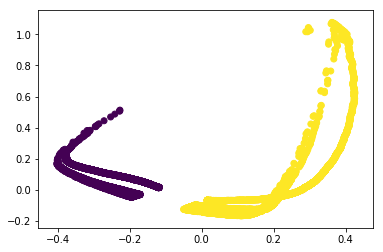

In [0]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()
#PCA binarized to two clusters, below is the output.

In [0]:
#mean-shift
bandwidth = estimate_bandwidth(X_pca, quantile=0.2)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pca)


#Labels
labels = ms.labels_

# Centers
cluster_centers = ms.cluster_centers_

# Count
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


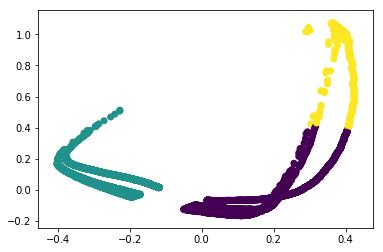

In [0]:
plt.scatter(X_pca[:,0],X_pca[:,1], c=labels)
plt.show()
#It looks like we're getting a similar shape w a different algorithm

In [3]:
#Spectral
#let's use 3 from the last model run
n_clusters = 3

spect = SpectralClustering(n_clusters=n_clusters)
spect.fit(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.show()

NameError: ignored

In [0]:
#Affinity
af = AffinityPropagation().fit(X_pca)

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

NameError: ignored